In [1]:
import librosa
import os
import pandas as pd
import glob
import numpy as np
import soundfile
from sklearn.model_selection import train_test_split

In [2]:
def extract_feature(file_name,mfcc,chroma,mel,zcr,rmse):
    with soundfile.SoundFile(file_name) as sound_file:
        X = sound_file.read(dtype="float32")
        sample_rate=sound_file.samplerate
        stft=np.abs(librosa.stft(X))
        result=np.array([])
        if mfcc:
            mfccs=np.mean(librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=40).T,axis=0)
            result=np.hstack((result, mfccs))
        if chroma:
            chroma=np.mean(librosa.feature.chroma_stft(S=stft, sr=sample_rate).T,axis=0)
            result=np.hstack((result, chroma))
        if mel:
            mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
            result=np.hstack((result, mel))
        if zcr:
            zcr=np.mean(librosa.feature.zero_crossing_rate(y=X, frame_length=2048, hop_length=512).T,axis=0)
            result=np.hstack((result, zcr))
        if rmse:
            rmse=np.mean(librosa.feature.rms(S=stft,frame_length=2048, hop_length=512, pad_mode='reflect').T,axis=0)
            result=np.hstack((result, rmse))
    return result

In [ ]:
#help

In [1]:
"""
savee_directory_list = os.listdir(Savee)

file_emotion = []
file_path = []

for file in savee_directory_list:
    file_path.append(Savee + file)
    part = file.split('_')[1]
    ele = part[:-6]
    if ele=='a':
        file_emotion.append('angry')
    elif ele=='d':
        file_emotion.append('disgust')
    elif ele=='f':
        file_emotion.append('fear')
    elif ele=='h':
        file_emotion.append('happy')
    elif ele=='n':
        file_emotion.append('neutral')
    elif ele=='sa':
        file_emotion.append('sad')
    else:
        file_emotion.append('surprise')
        

emotion_df = pd.DataFrame(file_emotion, columns=['Emotions'])


path_df = pd.DataFrame(file_path, columns=['Path'])
Savee_df = pd.concat([emotion_df, path_df], axis=1)
Savee_df.head()
Savee_df.Emotions.value_counts()

"""

"\nsavee_directory_list = os.listdir(Savee)\n\nfile_emotion = []\nfile_path = []\n\nfor file in savee_directory_list:\n    file_path.append(Savee + file)\n    part = file.split('_')[1]\n    ele = part[:-6]\n    if ele=='a':\n        file_emotion.append('angry')\n    elif ele=='d':\n        file_emotion.append('disgust')\n    elif ele=='f':\n        file_emotion.append('fear')\n    elif ele=='h':\n        file_emotion.append('happy')\n    elif ele=='n':\n        file_emotion.append('neutral')\n    elif ele=='sa':\n        file_emotion.append('sad')\n    else:\n        file_emotion.append('surprise')\n        \n\nemotion_df = pd.DataFrame(file_emotion, columns=['Emotions'])\n\n\npath_df = pd.DataFrame(file_path, columns=['Path'])\nSavee_df = pd.concat([emotion_df, path_df], axis=1)\nSavee_df.head()\nSavee_df.Emotions.value_counts()\n\n"

In [20]:
#Load the data and extract features for each sound file
def load_data(test_size=0.2):
    x,y=[],[]
    for file in glob.glob("D:/AAA_video_course/Programming/A_main/zzzdatasets/SAVEE/AudioData/Actor_*/*.wav"):
        file_name=os.path.basename(file)
        emotion=file_name[0]
        if emotion=='a':
          e='anger'
        if emotion=='d':
          e='disgust'
        if emotion=='f':
          e='fear'
        if emotion=='h':
          e='happy'
        if emotion=='n':
          e='neutral'
        if emotion=='s':
          if file_name[1]=='a':
            e='sad'
          else:
            e='surprise'
        feature=extract_feature(file,mfcc=True,chroma=True,mel=True,zcr=True,rmse=True)
        x.append(feature)
        y.append(e)
    return train_test_split(np.array(x), y, test_size=test_size)

In [21]:
x_train,x_test,y_train,y_test=load_data(test_size=0.2)

In [22]:
#Load the data and extract features for each sound file
def labels():
    y=[];
    for file in glob.glob("D:/AAA_video_course/Programming/A_main/zzzdatasets/SAVEE/AudioData/Actor*/*.wav"):
        file_name=os.path.basename(file)
        emotion=file_name[0]
        if emotion=='a':
          e='anger'
        if emotion=='d':
          e='disgust'
        if emotion=='f':
          e='fear'
        if emotion=='h':
          e='happy'
        if emotion=='n':
          e='neutral'
        if emotion=='s':
          if file_name[1]=='a':
            e='sad'
          else:
            e='surprise'
       
        y.append(e)
    return y

In [23]:
y = labels()
df = pd.DataFrame(y, columns =['emo'])
df

,emo
0,anger
1,anger
2,anger
3,anger
4,anger
...,...
475,surprise
476,surprise
477,surprise
478,surprise


In [24]:
y = labels()
y = np.array(y)
y = np.unique(y)
y.sort()
y = list(y)

[Text(0, 0, '60'),
 Text(0, 0, '60'),
 Text(0, 0, '60'),
 Text(0, 0, '60'),
 Text(0, 0, '120'),
 Text(0, 0, '60'),
 Text(0, 0, '60')]

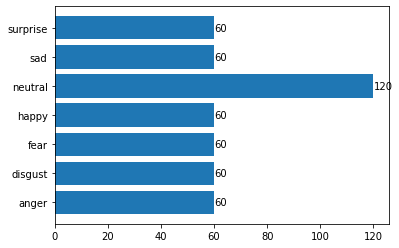

In [25]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

bars = plt.barh(y ,df.groupby('emo').size())
plt.bar_label(bars)

In [26]:
import librosa
%matplotlib inline
import matplotlib.pyplot as plt
import librosa.display
from IPython.display import Audio
import numpy as np
import tensorflow as tf
from matplotlib.pyplot import specgram
import pandas as pd
from sklearn.metrics import confusion_matrix
import IPython.display as ipd  # To play sound in the notebook
import os # interface with underlying OS that python is running on
import sys
import warnings
# ignore warnings 
if not sys.warnoptions:
    warnings.simplefilter("ignore")
warnings.filterwarnings("ignore", category=DeprecationWarning)
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import tensorflow.keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, AveragePooling1D
from tensorflow.keras.layers import Input, Flatten, Dropout, Activation, BatchNormalization, Dense
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.regularizers import l2
import seaborn as sns
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import classification_report

In [27]:
y_train=np.array(y_train)
y_test=np.array(y_test)

In [28]:
# ONE HOT ENCODE THE TARGET
lb = LabelEncoder()
y_train = to_categorical(lb.fit_transform(y_train))
y_test = to_categorical(lb.fit_transform(y_test))

In [29]:
# RESHAPE DATA TO INCLUDE 3D TENSOR 
x_train = x_train[:,:,np.newaxis]
x_test = x_test[:,:,np.newaxis]
x_train.shape

(384, 182, 1)

In [30]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential, load_model

#BUILD 1D CNN LAYERS
model = tf.keras.Sequential()
model.add(layers.Conv1D(64, kernel_size=(10), activation='relu', input_shape=(x_train.shape[1],1)))
model.add(layers.Conv1D(128, kernel_size=(10),activation='relu',kernel_regularizer=l2(0.01), bias_regularizer=l2(0.01)))
model.add(layers.MaxPooling1D(pool_size=(8)))
model.add(layers.Dropout(0.4))
model.add(layers.Conv1D(128, kernel_size=(10),activation='relu'))
model.add(layers.MaxPooling1D(pool_size=(8)))
model.add(layers.Dropout(0.4))
model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(7, activation='sigmoid'))
opt = keras.optimizers.Adam(lr=0.001)
model.compile(loss='categorical_crossentropy', optimizer=opt,metrics=['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_3 (Conv1D)           (None, 173, 64)           704       
                                                                 
 conv1d_4 (Conv1D)           (None, 164, 128)          82048     
                                                                 
 max_pooling1d_2 (MaxPooling  (None, 20, 128)          0         
 1D)                                                             
                                                                 
 dropout_3 (Dropout)         (None, 20, 128)           0         
                                                                 
 conv1d_5 (Conv1D)           (None, 11, 128)           163968    
                                                                 
 max_pooling1d_3 (MaxPooling  (None, 1, 128)           0         
 1D)                                                  

In [31]:
import tensorflow.keras as keras
model_history=model.fit(x_train, y_train,batch_size=64, epochs=120, validation_data=(x_test, y_test))

Epoch 1/120
6/6 [==============================] - 2s 77ms/step - loss: 6.5147 - accuracy: 0.1771 - val_loss: 3.4732 - val_accuracy: 0.2396
Epoch 2/120
6/6 [==============================] - 0s 45ms/step - loss: 4.2735 - accuracy: 0.2448 - val_loss: 2.7667 - val_accuracy: 0.2396
Epoch 3/120
6/6 [==============================] - 0s 45ms/step - loss: 3.1880 - accuracy: 0.2786 - val_loss: 2.6359 - val_accuracy: 0.2188
Epoch 4/120
6/6 [==============================] - 0s 46ms/step - loss: 2.7304 - accuracy: 0.3203 - val_loss: 2.6284 - val_accuracy: 0.2812
Epoch 5/120
6/6 [==============================] - 0s 45ms/step - loss: 2.6928 - accuracy: 0.3203 - val_loss: 2.6056 - val_accuracy: 0.2708
Epoch 6/120
6/6 [==============================] - 0s 45ms/step - loss: 2.5674 - accuracy: 0.3333 - val_loss: 2.5869 - val_accuracy: 0.2396
Epoch 7/120
6/6 [==============================] - 0s 45ms/step - loss: 2.4992 - accuracy: 0.3620 - val_loss: 2.5432 - val_accuracy: 0.2604
Epoch 8/120
6/6 [===

6/6 [==============================] - 0s 44ms/step - loss: 0.7227 - accuracy: 0.7995 - val_loss: 1.1273 - val_accuracy: 0.6354
Epoch 118/120
6/6 [==============================] - 0s 46ms/step - loss: 0.7603 - accuracy: 0.7917 - val_loss: 1.1538 - val_accuracy: 0.5625
Epoch 119/120
6/6 [==============================] - 0s 47ms/step - loss: 0.7115 - accuracy: 0.8073 - val_loss: 1.1304 - val_accuracy: 0.6146
Epoch 120/120
6/6 [==============================] - 0s 47ms/step - loss: 0.7606 - accuracy: 0.7943 - val_loss: 1.0777 - val_accuracy: 0.6250


In [32]:
# PRINT LOSS AND ACCURACY PERCENTAGE ON TEST SET
print("Loss of the model is - " , model.evaluate(x_test,y_test)[0])
print("Accuracy of the model is - " , model.evaluate(x_test,y_test)[1]*100 , "%")

3/3 [==============================] - 0s 19ms/step - loss: 1.0777 - accuracy: 0.6250
Loss of the model is -  1.077724814414978
3/3 [==============================] - 0s 18ms/step - loss: 1.0777 - accuracy: 0.6250
Accuracy of the model is -  62.5 %


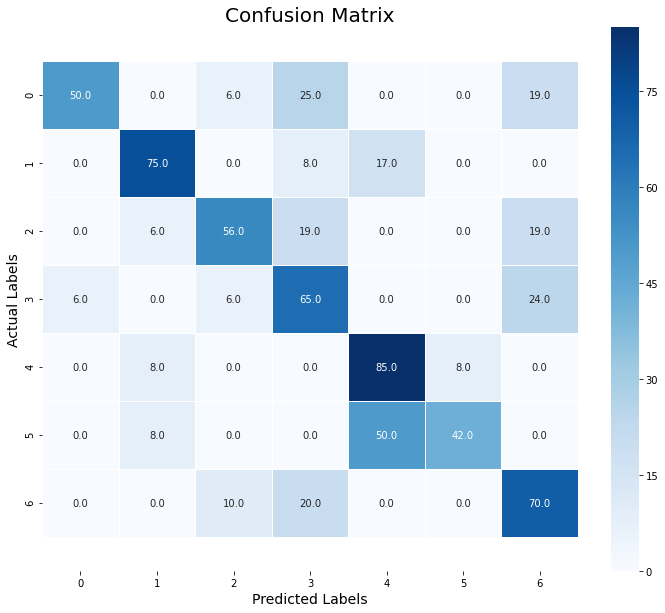

In [33]:
predictions = model.predict(x_test)
predictions = predictions.argmax(axis=1)
predictions = predictions.astype(int).flatten()
predictions = (lb.inverse_transform((predictions)))
actual = y_test.argmax(axis=1)
actual = actual.astype(int).flatten()
actual = (lb.inverse_transform((actual)))
cm = confusion_matrix(actual, predictions,normalize='true')
plt.figure(figsize = (12, 10))
#conf_matrix= pd.DataFrame(cm,columns=None)
#conf_matrix.to_csv(r'E:\confusion_matrix.csv', index = False, header=False)
ax = sns.heatmap(np.round(cm*100), linecolor='white', cmap='Blues', linewidth=1, annot=True, fmt='')
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.title('Confusion Matrix', size=20)
plt.xlabel('Predicted Labels', size=14)
plt.ylabel('Actual Labels', size=14)
plt.savefig('Initial_Model_Confusion_Matrix.png')
plt.show()

In [34]:
print(classification_report(actual, predictions, target_names = ['anger','disgust','fear','happy','neutral','sad','surprise']))

              precision    recall  f1-score   support

       anger       0.89      0.50      0.64        16
     disgust       0.75      0.75      0.75        12
        fear       0.75      0.56      0.64        16
       happy       0.52      0.65      0.58        17
     neutral       0.58      0.85      0.69        13
         sad       0.83      0.42      0.56        12
    surprise       0.41      0.70      0.52        10

    accuracy                           0.62        96
   macro avg       0.68      0.63      0.62        96
weighted avg       0.69      0.62      0.63        96



In [35]:
from imblearn.metrics import specificity_score
s=specificity_score(actual,predictions,average='macro')
print(s)
from sklearn.metrics import roc_auc_score
y_score=model.predict(x_test)
auc=roc_auc_score(y_test, y_score, average='macro',multi_class='ovo')
print(auc)

0.9375905802805461
0.8935755270562954


In [36]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
p=precision_score(actual,predictions,average='macro')
r=recall_score(actual,predictions,average='macro')
f=f1_score(actual,predictions,average='macro')
print(p,r,f)

0.6766776886193073 0.6317684766214178 0.6247683693360385


In [37]:
FP = cm.sum(axis=0) - np.diag(cm)  
FN = cm.sum(axis=1) - np.diag(cm)
TP = np.diag(cm)
TN = cm.sum() - (FP + FN + TP)

FP = FP.astype(float)
FN = FN.astype(float)
TP = TP.astype(float)
TN = TN.astype(float)

# Sensitivity, hit rate, recall, or true positive rate
TPR = TP/(TP+FN)
# Fall out or false positive rate
FPR = FP/(FP+TN)
print(TPR)
print(FPR)

[0.5        0.75       0.5625     0.64705882 0.84615385 0.41666667
 0.7       ]
[0.00980392 0.03712607 0.03688725 0.12013889 0.11111111 0.01282051
 0.10171569]


In [38]:
l=[]
for i in range(100):
  l.append(i+1)

In [39]:
from pandas import DataFrame
C = {'epoch no':l,
    'acc train':model_history.history['accuracy'],
    'acc val':model_history.history['val_accuracy'],
    'loss train':model_history.history['loss'],
    'loss val':model_history.history['val_loss']}
df = DataFrame(C, columns= ['epoch no','acc train','acc val','loss train','loss val'])
export_csv = df.to_csv (r'E:\result1.csv', index = None, header=True) 
print (df)

ValueError: All arrays must be of the same length

In [ ]:
from pandas import DataFrame
C = {
     'train acc':[str(model_history.history['accuracy'][99])],
     'test acc':[str(model_history.history['val_accuracy'][99])],
     'precision(macro)':[str(p)],
     'recall(macro)':[str(r)],
     'f1(macro)':[str(f)],
     'specificity(macro)':[str(s)],
     'AUC(macro)':[str(auc)],
     'train time per epoch':['1 sec'],
     'test time per epoch':['1 sec'],}
df = DataFrame(C, columns= ['train acc','test acc','precision(macro)','recall(macro)','f1(macro)','specificity(macro)','AUC(macro)','train time per epoch','test time per epoch'])
export_csv = df.to_csv (r'E:\result2.csv', index = None, header=True) 
print (df)

In [40]:
from pandas import DataFrame
C = {
     'TPR': TPR,
     'FPR': FPR}
df = DataFrame(C, columns= ['TPR','FPR'])
export_csv = df.to_csv (r'E:\result3.csv', index = None, header=True) 
print (df)

        TPR       FPR
0  0.500000  0.009804
1  0.750000  0.037126
2  0.562500  0.036887
3  0.647059  0.120139
4  0.846154  0.111111
5  0.416667  0.012821
6  0.700000  0.101716


(array([0.5, 1.5, 2.5, 3.5, 4.5, 5.5, 6.5]),
 [Text(0, 0.5, 'anger'),
  Text(0, 1.5, 'disgust'),
  Text(0, 2.5, 'fear'),
  Text(0, 3.5, 'happy'),
  Text(0, 4.5, 'neutral'),
  Text(0, 5.5, 'sad'),
  Text(0, 6.5, 'surprise')])

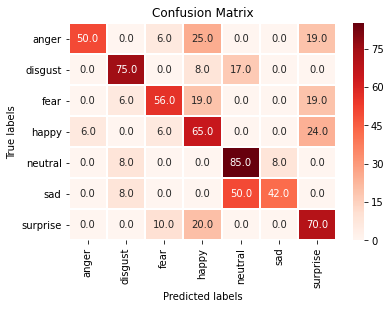

In [41]:
import seaborn as sns
import matplotlib.pyplot as plt     

ax= plt.subplot()
sns.heatmap(np.round(cm*100), annot=True,linecolor='white', cmap='Reds', linewidth=2, fmt='', ax=ax);  #annot=True to annotate cells, ftm='g' to disable scientific notation

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(y); ax.yaxis.set_ticklabels(y);
plt.xticks(rotation=90)
plt.yticks(rotation=0)
